<a href="https://colab.research.google.com/github/vpbajaj/Personal-Projects/blob/master/Basemap_for_India_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas
!apt-get install -q libgeos-3.5.0

!apt-get install -q libgeos-dev

!pip install -q https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists...
Building dependency tree...
Reading state information...
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists...
Building dependency tree...
Reading state information...
libgeos-dev is already the newest version (3.6.2-1build2).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
!pip install -q pyproj==1.9.6

     |████████████████████████████████| 2.8MB 3.4MB/s 
ERROR: geopandas 0.8.1 has requirement pyproj>=2.2.0, but you'll have pyproj 1.9.6 which is incompatible.


In [ ]:
%pip install geopandas

In [ ]:
import geopandas
import numpy as np
import pandas as pd
from shapely.geometry import Point

import missingno as msn

import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
%matplotlib inline

In [ ]:
filename = '/content/drive/My Drive/maps-master/Districts/Census_2011/2011_Dist.shp'
# Getting to know GEOJSON file:
country = geopandas.read_file(filename)
country.head()

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry
0,Adilabad,Andhra Pradesh,28,1,532,"POLYGON ((78.84972 19.76010, 78.85102 19.75945..."
1,Agra,Uttar Pradesh,9,15,146,"POLYGON ((78.19803 27.40280, 78.19804 27.40278..."
2,Ahmadabad,Gujarat,24,7,474,"MULTIPOLYGON (((72.03456 23.50527, 72.03337 23..."
3,Ahmadnagar,Maharashtra,27,26,522,"POLYGON ((74.67333 19.94670, 74.67393 19.93509..."
4,Aizawl,Mizoram,15,3,283,"POLYGON ((92.98749 24.40453, 92.99107 24.40236..."


In [ ]:
# checking the type of dataframe that I just loaded
type(country)

geopandas.geodataframe.GeoDataFrame

In [ ]:
# Checking the data type of the column containing coordinates: it's GeoSeries
type(country.geometry)

geopandas.geoseries.GeoSeries

In [ ]:
type(country.geometry[0])

shapely.geometry.polygon.Polygon

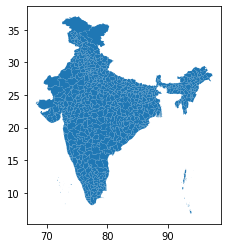

In [ ]:
country.plot()

In [ ]:
#country_copy = country.copy()

In [ ]:
#country = country[country.ST_NM=='Karnataka']
country

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry
0,Adilabad,Andhra Pradesh,28,1,532,"POLYGON ((78.84972 19.76010, 78.85102 19.75945..."
1,Agra,Uttar Pradesh,9,15,146,"POLYGON ((78.19803 27.40280, 78.19804 27.40278..."
2,Ahmadabad,Gujarat,24,7,474,"MULTIPOLYGON (((72.03456 23.50527, 72.03337 23..."
3,Ahmadnagar,Maharashtra,27,26,522,"POLYGON ((74.67333 19.94670, 74.67393 19.93509..."
4,Aizawl,Mizoram,15,3,283,"POLYGON ((92.98749 24.40453, 92.99107 24.40236..."
...,...,...,...,...,...,...
636,Tapi,Gujarat,24,26,493,"POLYGON ((74.08573 21.55513, 74.08672 21.55515..."
637,Nicobar,Andaman & Nicobar Island,35,1,638,"MULTIPOLYGON (((93.84861 7.24051, 93.84870 7.2..."
638,South Andaman,Andaman & Nicobar Island,35,3,640,"MULTIPOLYGON (((92.69758 12.23961, 92.69778 12..."
639,North & Middle Andaman,Andaman & Nicobar Island,35,2,639,"MULTIPOLYGON (((92.89905 12.91512, 92.89905 12..."


In [ ]:
# florence = water_data_file
florence = pd.read_csv('/content/drive/My Drive/gis_maharashtra_water_data.csv')
florence.head()

,latitude,longitude
0,21.204000,74.175301
1,21.280399,74.450600
2,21.294300,74.411102
3,21.281000,74.482101
4,21.272301,74.575500


In [ ]:
florence.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1643 entries, 0 to 1642
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   1643 non-null   float64
 1   longitude  1643 non-null   float64
dtypes: float64(2)
memory usage: 25.8 KB


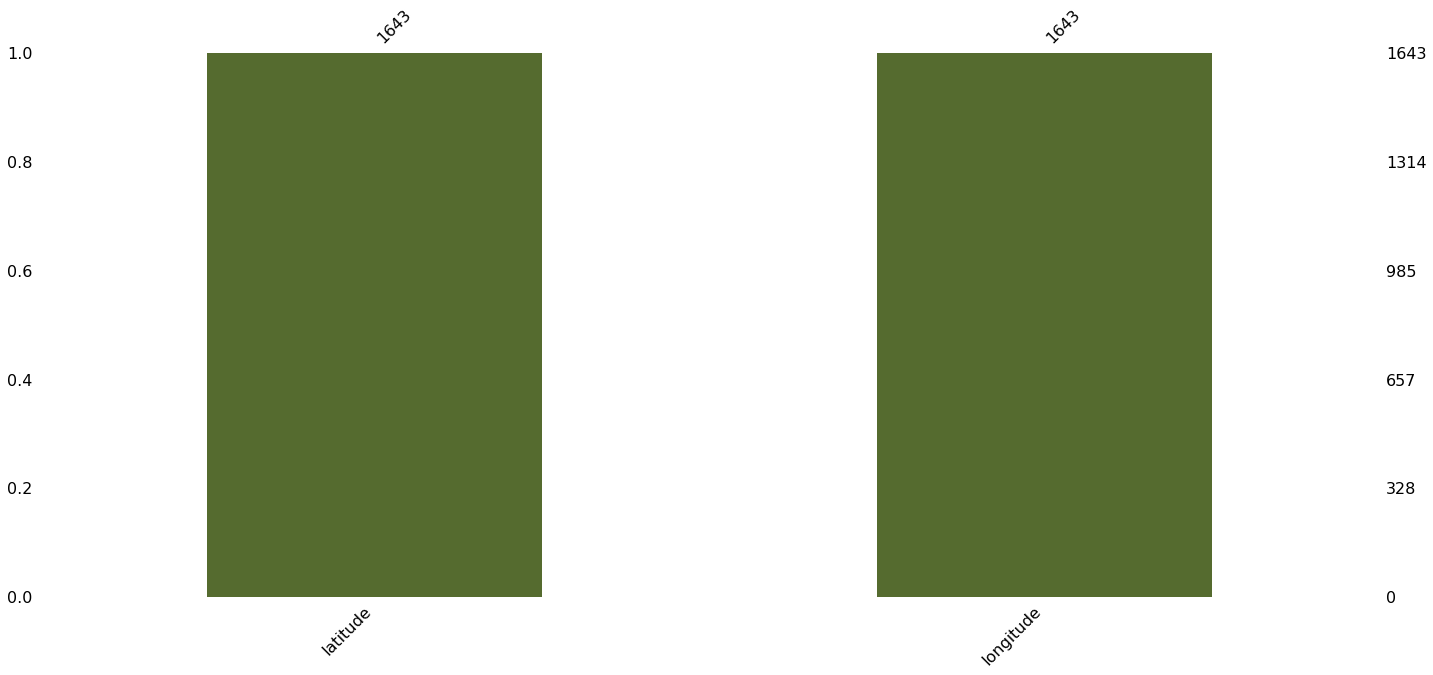

In [ ]:
# Notice you can always adjust the color of the visualization
msn.bar(florence, color='darkolivegreen');

In [ ]:
# Combining Lattitude and Longitude to create maharashtra watershed coordinates:
florence['coordinates'] = florence[['longitude', 'latitude']].values.tolist()
florence.head()

/usr/local/lib/python3.6/dist-packages/geopandas/geodataframe.py:852: UserWarning: Geometry column does not contain geometry.
  warnings.warn("Geometry column does not contain geometry.")


,latitude,longitude,coordinates
0,21.204000,74.175301,"[74.17530059814453, 21.20400047302246]"
1,21.280399,74.450600,"[74.45059967041016, 21.280399322509766]"
2,21.294300,74.411102,"[74.41110229492188, 21.294300079345703]"
3,21.281000,74.482101,"[74.48210144042969, 21.2810001373291]"
4,21.272301,74.575500,"[74.57550048828125, 21.272300720214844]"


In [ ]:
# Change the coordinates to a geoPoint
florence['coordinates'] = florence['coordinates'].apply(Point)
florence.head()

,latitude,longitude,coordinates
0,21.204000,74.175301,POINT (74.17530 21.20400)
1,21.280399,74.450600,POINT (74.45060 21.28040)
2,21.294300,74.411102,POINT (74.41110 21.29430)
3,21.281000,74.482101,POINT (74.48210 21.28100)
4,21.272301,74.575500,POINT (74.57550 21.27230)


In [ ]:
type(florence)

geopandas.geodataframe.GeoDataFrame

In [ ]:
type(florence['coordinates'])

geopandas.geoseries.GeoSeries

In [ ]:
# Convert the count df to geodf
florence = geopandas.GeoDataFrame(florence, geometry='coordinates')
florence.head()

,latitude,longitude,coordinates
0,21.204000,74.175301,POINT (74.17530 21.20400)
1,21.280399,74.450600,POINT (74.45060 21.28040)
2,21.294300,74.411102,POINT (74.41110 21.29430)
3,21.281000,74.482101,POINT (74.48210 21.28100)
4,21.272301,74.575500,POINT (74.57550 21.27230)


In [ ]:
type(florence)

geopandas.geodataframe.GeoDataFrame

In [ ]:
type(florence['coordinates'])

geopandas.geoseries.GeoSeries

In [ ]:
print(florence.crs)

None


In [ ]:
country.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
florence_geometry = florence['coordinates']
florence_geometry.head()

0    POINT (74.17530 21.20400)
1    POINT (74.45060 21.28040)
2    POINT (74.41110 21.29430)
3    POINT (74.48210 21.28100)
4    POINT (74.57550 21.27230)
Name: coordinates, dtype: geometry

In [ ]:
print(florence_geometry.crs)

EPSG:4326


In [ ]:
florence_geometry.crs = "EPSG:4326"
#florence_geometry = florence_geometry.to_crs()

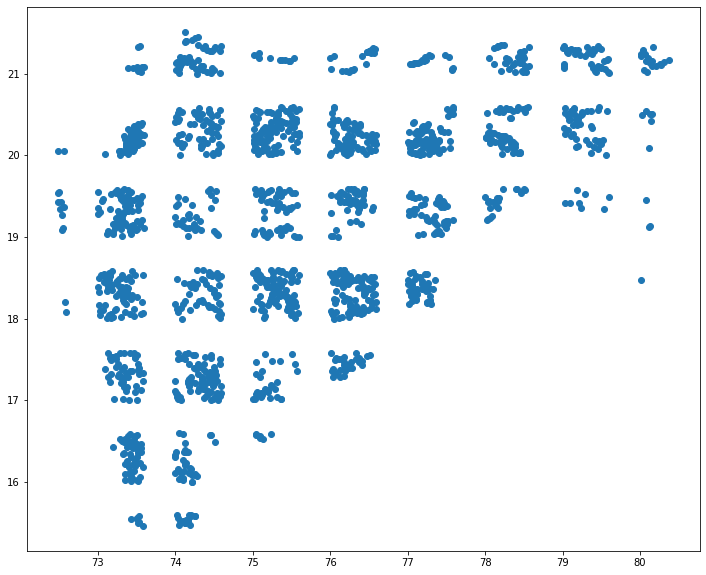

In [ ]:
florence_geometry.plot(figsize=(20,10));

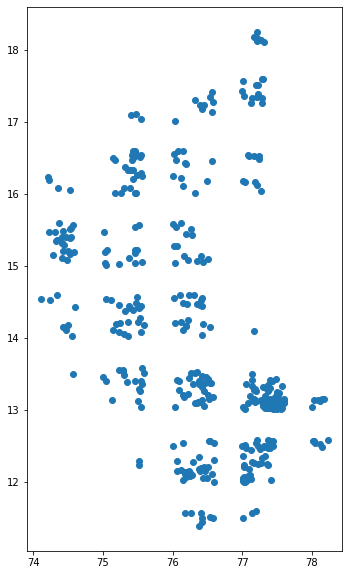

In [ ]:
# another file: Karnataka 
karnataka = pd.read_csv('/content/drive/My Drive/gis_karnataka_water_data_3.csv')
karnataka['coordinates'] = karnataka[['longitude', 'latitude']].values.tolist()
karnataka['coordinates'] = karnataka['coordinates'].apply(Point)
karnataka = geopandas.GeoDataFrame(karnataka, geometry='coordinates')
karnataka.crs = "EPSG:4326"
karnataka.plot(figsize=(20,10));

In [ ]:
karnataka.to_crs(epsg=32643)

,latitude,longitude,coordinates
0,12.234700,75.522102,POINT (556786.664 1352561.374)
1,12.011300,77.053001,POINT (723522.537 1328636.815)
2,12.002400,76.593697,POINT (673507.403 1327320.968)
3,12.011700,77.010696,POINT (718914.459 1328647.007)
4,12.361400,77.010101,POINT (718562.982 1367338.023)
...,...,...,...
437,17.382601,77.220497,POINT (735920.924 1923247.289)
438,17.343800,77.214203,POINT (735301.464 1918944.360)
439,17.324200,77.142097,POINT (727660.056 1916687.879)
440,17.272499,76.585800,POINT (668569.713 1910393.419)


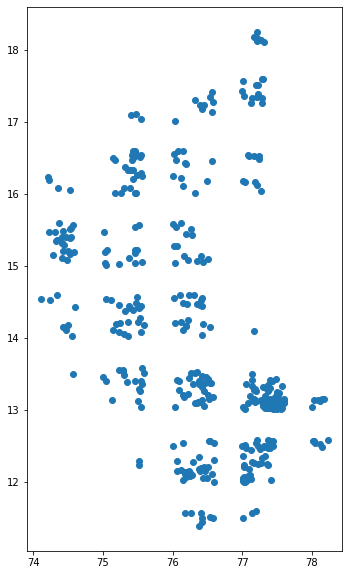

In [ ]:
# another file: Karnataka 
k2 = pd.read_csv('/content/drive/My Drive/gis_karnataka_water_data_3.csv')
k2['coordinates'] = k2[['longitude', 'latitude']].values.tolist()
k2['coordinates'] = k2['coordinates'].apply(Point)
k2 = geopandas.GeoDataFrame(k2, geometry='coordinates')
k2.crs = country.crs
k2.plot(figsize=(20,10));

In [ ]:
karnataka.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
k2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   latitude     442 non-null    float64 
 1   longitude    442 non-null    float64 
 2   coordinates  442 non-null    geometry
dtypes: float64(2), geometry(1)
memory usage: 10.5 KB


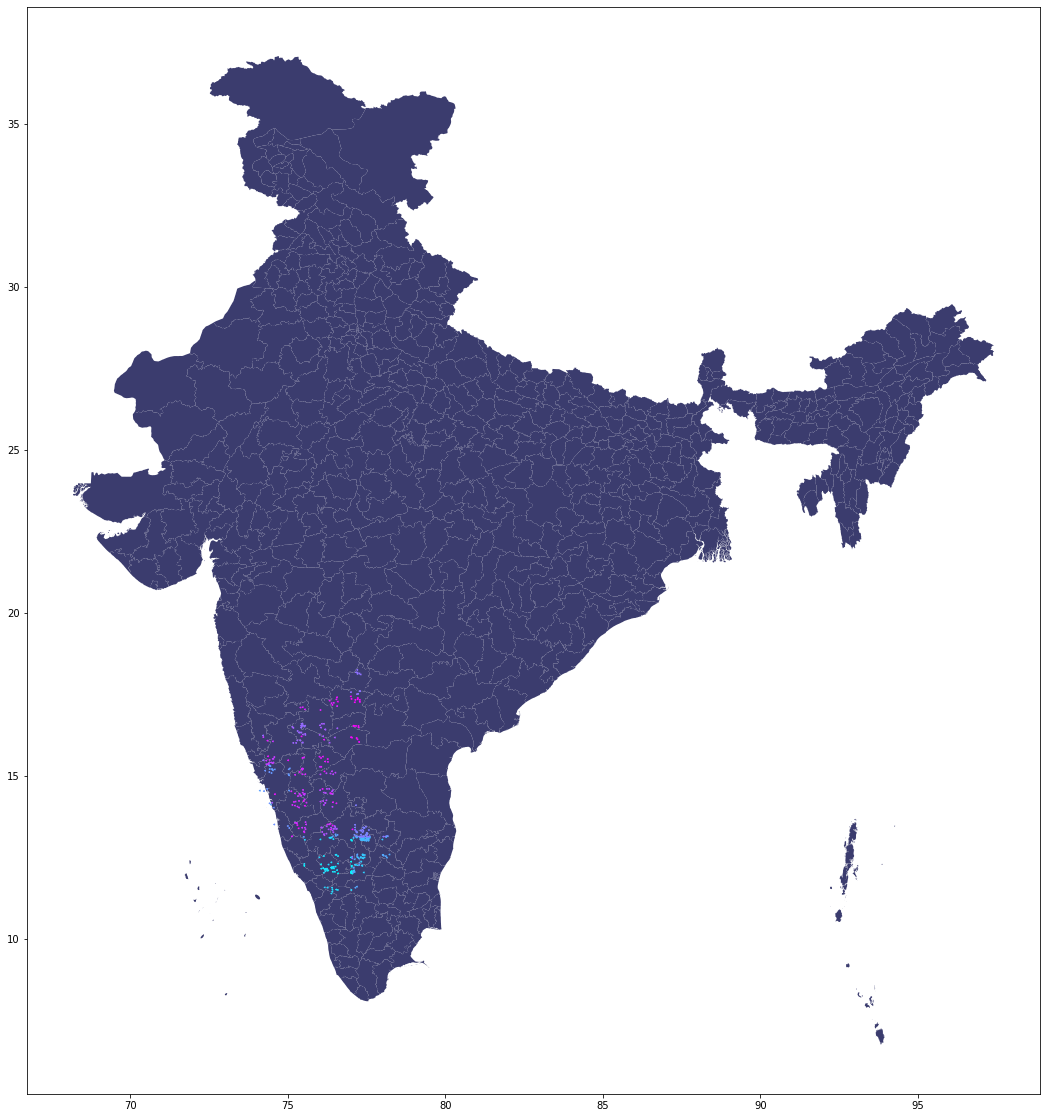

In [ ]:
# Plotting to see the hurricane overlay the US map:
fig, ax = plt.subplots(1, figsize=(30,20))
#base = country_copy[country_copy['ST_NM'].isin(['Karnataka']) == True].plot(ax=ax, color='#3B3C6E')
base = country.plot(ax=ax, color='#3B3C6E')
# plotting the hurricane position on top with red color to stand out:
#florence.plot(ax=base, color='darkred', marker="*", markersize=1);
karnataka.plot(ax=base, marker="<", markersize=1, cmap='cool');
#plt.savefig('India-Karnataka water surface bodies_1.png', format='png', dpi=300);

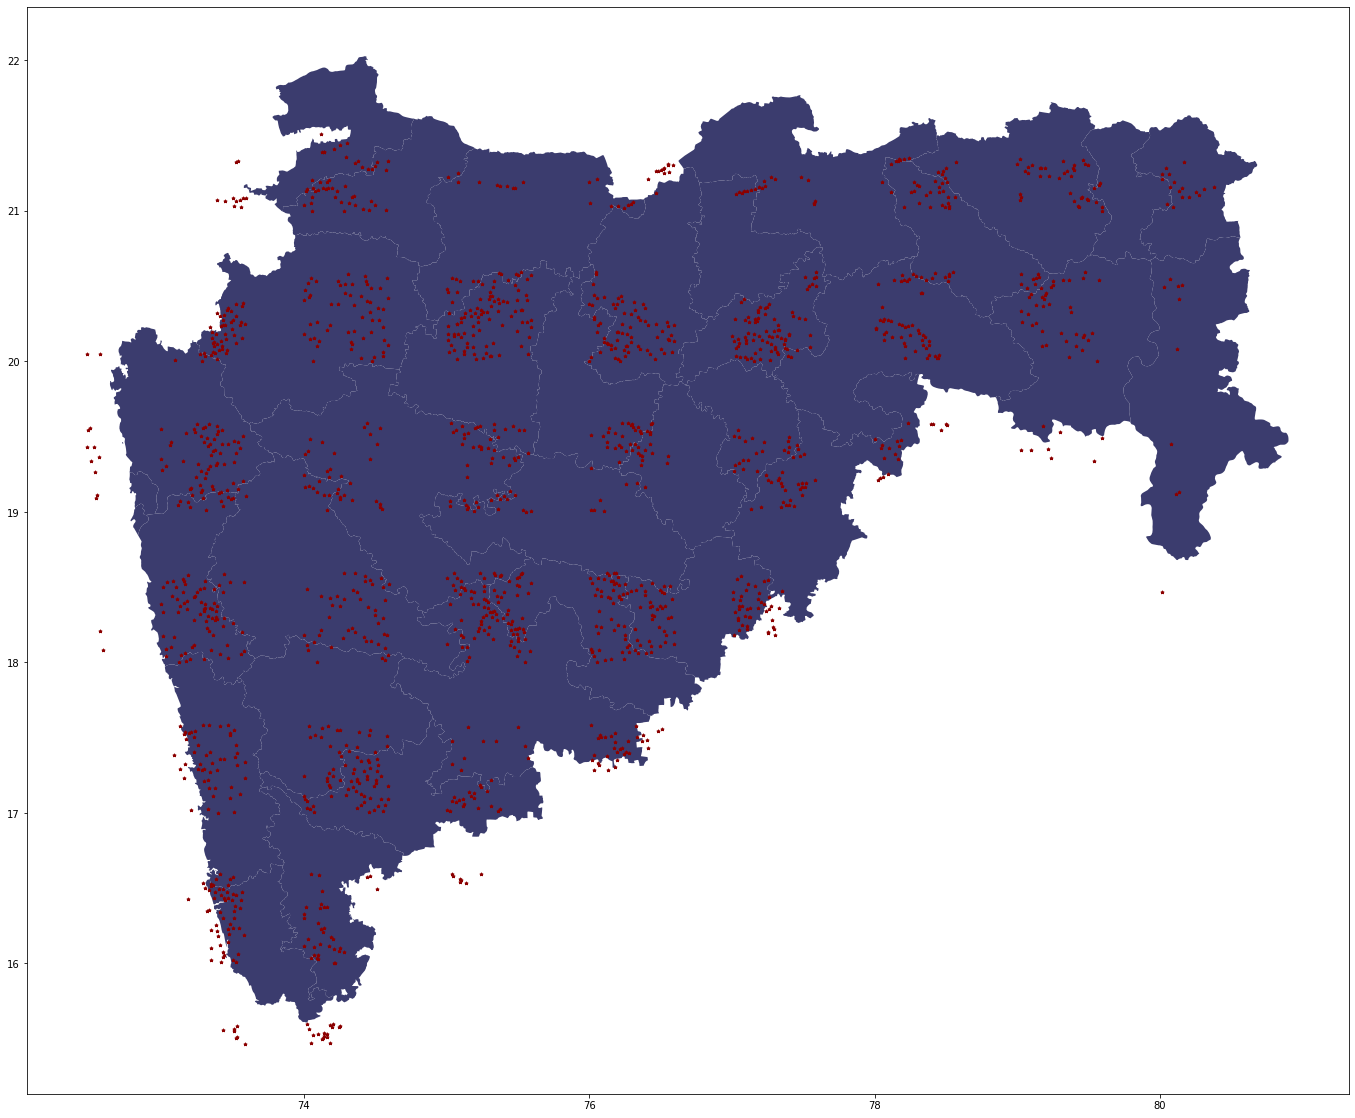

In [ ]:
# Plotting to see the hurricane overlay the US map:
fig, ax = plt.subplots(1, figsize=(30,20))
base = country[country['ST_NM'].isin(['Maharashtra']) == True].plot(ax=ax, color='#3B3C6E')
#base = country.plot(ax=ax, color='#3B3C6E')
# plotting the hurricane position on top with red color to stand out:
florence.plot(ax=base, color='darkred', marker="*", markersize=10);

Text(0.5, 1.0, 'Karnataka')

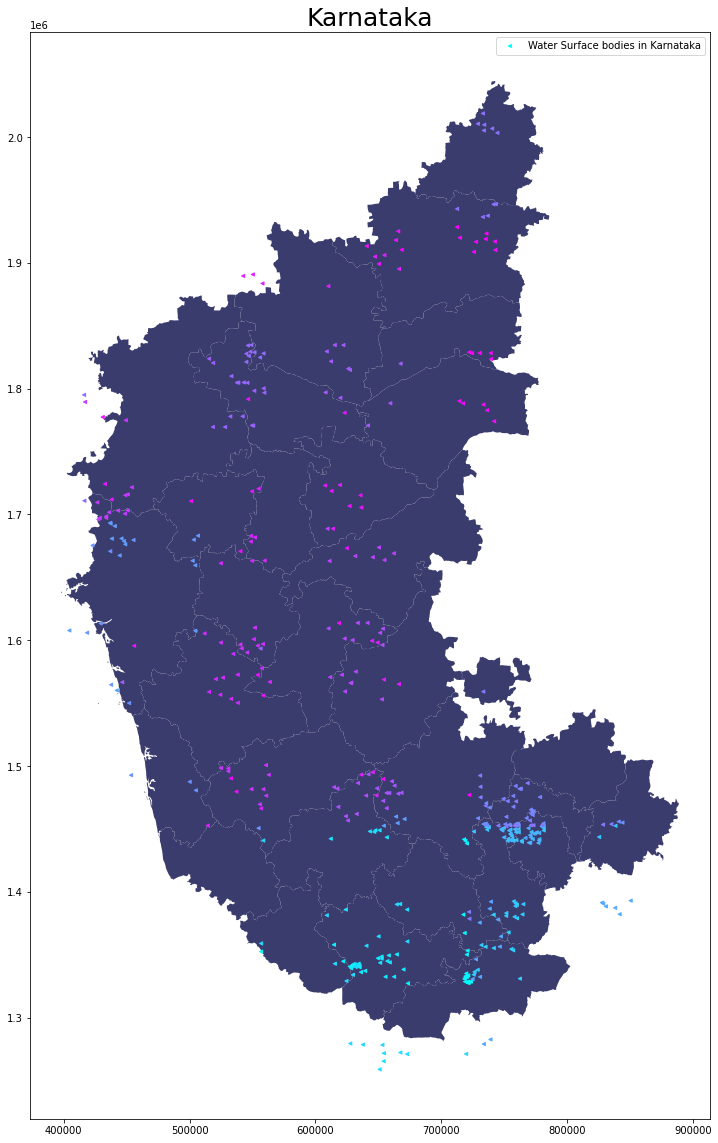

In [ ]:
fig, ax = plt.subplots(1, figsize=(20,20))
#base = country.plot(ax=ax, color='#3B3C6E')
base = country[country['ST_NM'].isin(['Karnataka']) == True].to_crs(epsg=32643).plot(ax=ax, color='#3B3C6E')
karnataka.to_crs(epsg=32643).plot(ax=base, marker="<", markersize=10, cmap='cool', label="Water Surface bodies in Karnataka")
#_ = ax.axis('off')
plt.legend()
ax.set_title("Karnataka", fontsize=25)
#plt.savefig('Karnataka water surface bodies_1.png',bbox_inches='tight', format='png', dpi=300);

In [ ]:
%matplotlib inline

import numpy as np 
import matplotlib.pyplot as plt 
from mpl_toolkits.basemap import Basemap

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


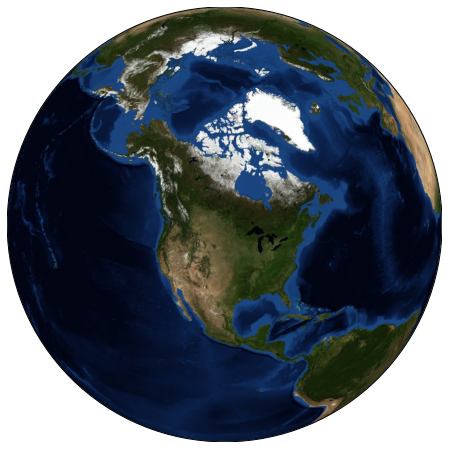

In [ ]:
plt.figure(figsize=(8, 8))

m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100) 
m.bluemarble(scale=0.5);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


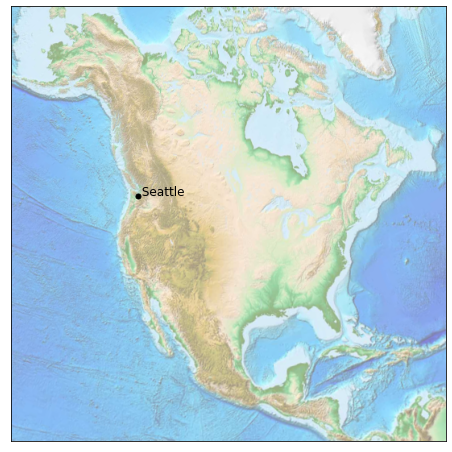

In [ ]:
fig = plt.figure(figsize=(8, 8))

m = Basemap(projection='lcc', resolution=None, width=8E6, height=8E6, lat_0=45, lon_0=-100,) 
m.etopo(scale=0.5, alpha=0.5)

# Map (long, lat) to (x, y) for plotting 

x, y = m(-122.3, 47.6)

plt.plot(x, y, 'ok', markersize=5)

plt.text(x, y, ' Seattle', fontsize=12);

In [ ]:
import pandas as pd 
cities = pd.read_csv('/content/drive/My Drive/gis_karnataka_water_data_3.csv')

# Extract the data we're interested in 
lat = cities['latitude'].values 
lon = cities['longitude'].values 

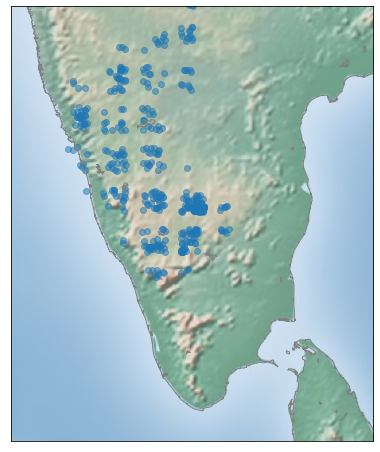

In [ ]:
fig = plt.figure(figsize=(8, 8))

m = Basemap(projection='lcc', resolution='h', lat_0=12.71, lon_0=77.28, width=1E6, height=1.2E6) 
m.shadedrelief() 
m.drawcoastlines(color='gray') 
m.drawcountries(color='gray') 
m.drawstates(color='gray')
m.scatter(lon, lat, latlon=True, cmap='Reds', alpha=0.5)

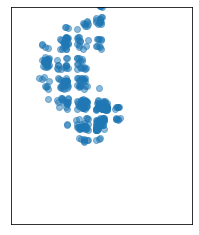

In [ ]:
m.scatter(lon, lat, latlon=True, cmap='Reds', alpha=0.5)

In [ ]:
plt.clim(3, 7)

RuntimeError: ignored

<Figure size 432x288 with 0 Axes>

No handles with labels found to put in legend.


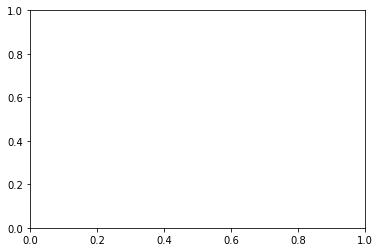

In [ ]:
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, loc='lower left');

In [ ]:
florence.plot(ax=base, marker="<", markersize=10, cmap='cool', label="Water Surface bodies in Karnataka")
#_ = ax.axis('off')